# Summary 

# Introduction

The goal of this project is to develop a model by applying k-nearest neighbors (KNN) algorithm to predict a car's market price using information, collected from *1985 Ward's Automotive Yearbook*, about each car, outlined in the table below. The dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile) as the file `imports-85.data`

> This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
>
> The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.
>
> Note: Several of the attributes in the database could be used as a "class" attribute

| Column Name       | Observation Summary                                                                                                                                                                              |
|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| symboling         | -3, -2, -1, 0, 1, 2, 3                                                                                                                                                                           |
| normalized-losses | continuous from 65 to 256                                                                                                                                                                        |
| make              | alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche,  renault, saab, subaru, toyota, volkswagen, volvo |
| fuel-type         | diesel, gas                                                                                                                                                                                      |
| aspiration        | std, turbo                                                                                                                                                                                       |
| num-of-doors      | four, two                                                                                                                                                                                        |
| body-style        | hardtop, wagon, sedan, hatchback, convertible                                                                                                                                                    |
| drive-wheels      | 4wd, fwd, rwd                                                                                                                                                                                    |
| engine-location   | front, rear                                                                                                                                                                                      |
| wheel-base        | continuous from 86.6 120.9                                                                                                                                                                       |
| length            | continuous from 141.1 to 208.1                                                                                                                                                                   |
| width             | continuous from 60.3 to 72.3                                                                                                                                                                     |
| height            | continuous from 47.8 to 59.8                                                                                                                                                                     |
| curb-weight       | continuous from 1488 to 4066                                                                                                                                                                     |
| engine-type       | dohc, dohcv, l, ohc, ohcf, ohcv, rotor                                                                                                                                                           |
| num-of-cylinders  | eight, five, four, six, three, twelve, two                                                                                                                                                       |
| engine-size       | continuous from 61 to 326                                                                                                                                                                        |
| fuel-system       | 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi                                                                                                                                                     |
| bore              | continuous from 2.54 to 3.94                                                                                                                                                                     |
| stroke            | continuous from 2.07 to 4.17                                                                                                                                                                     |
| compression-ratio | continuous from 7 to 23                                                                                                                                                                          |
| horsepower        | continuous from 48 to 288                                                                                                                                                                        |
| peak-rpm          | continuous from 4150 to 6600                                                                                                                                                                     |
| city-mpg          | continuous from 13 to 49                                                                                                                                                                         |
| highway-mpg       | continuous from 16 to 54                                                                                                                                                                         |
| price             | continuous from 5118 to 45400                                                                                                                                                                    |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as meansqerr
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns

pd.options.display.max_columns = 99
pd.options.display.max_rows = 20

col_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", 
             "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", 
             "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", 
             "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", 
             "peak-rpm", "city-mpg", "highway-mpg", "price"]
cars = pd.read_csv('data/imports-85.data', names=col_names)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


There are 205 entries (cars) in the dataframe, so fortunately, there are no missing values currently in the dataset.

However, in a few columns there are values represented by "?" which are described in the data description, `imports-85.name`, as missing, I will replace these entries with `np.NaN` in the next section.

From the 26 columns, I will only need the numeric ones that can be used as features for KNN. I will determine which columns are numeric from the documentation and store the column names in a list:

In [5]:
features = ["normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", 
            "engine-size", "bore", "stroke", "compression-ratio", "horsepower", 
            "peak-rpm", "city-mpg", "highway-mpg"]
target = ['price']

# K Neighbors Test Train

## Data Cleaning

In [6]:
cars = cars.replace('?', np.nan)

In [7]:
working_set = cars[features + target].astype('float')

In [8]:
working_set.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

`normalized-losses` has many missing values, about 19.5% of the totals observations. If I were to remove these rows then I would also lose a significant amount of data. Perhaps, dropping the whole column instead of trying to fill the missing values would be more time efficient, but I will keep it for now.

Other than `normalized-losses` there some missing values in the other columns that I would like to see.

In [9]:
working_set[working_set.drop('normalized-losses', axis=1).isna().any(axis=1)]
# working_set.isna().any(axis=1)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,NaN,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
44,NaN,94.5,155.9,63.6,52.0,1874.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
45,NaN,94.5,155.9,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
55,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,150.0,95.3,169.0,65.7,49.6,2380.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,150.0,95.3,169.0,65.7,49.6,2385.0,70.0,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,150.0,95.3,169.0,65.7,49.6,2500.0,80.0,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0
129,NaN,98.4,175.7,72.3,50.5,3366.0,203.0,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,NaN
130,NaN,96.1,181.5,66.5,55.2,2579.0,132.0,3.46,3.90,8.7,NaN,NaN,23.0,31.0,9295.0
131,NaN,96.1,176.8,66.6,50.5,2460.0,132.0,3.46,3.90,8.7,NaN,NaN,23.0,31.0,9895.0


I will drop the rows with missing values in `price`, then fill all the missing values with the mean of their respective column. `normalized-losses` has too much information to delete and I can experiment with how it affects the model, so I will include it in my model.

In [10]:
working_set = working_set.dropna(subset=['price']).fillna(working_set.mean())
display(working_set)
display(working_set.isna().sum())

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Normalize the data to reduce some bias

In [11]:
normal_working_set = (working_set - working_set.min()) / (working_set.max() - working_set.min())
normal_working_set['price'] = working_set['price']
normal_working_set

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


# Univariate Model

I will observe the errors, in the form of Root Mean Square Error (RMSE), of a univariate model for each column to help me determine which columns could be optimal features for a multivariate model.

In [12]:
def knn_train_test(train_col, target_col, df, k):
    np.random.seed(1)
    shuffled_df = df.reindex(np.random.permutation(df.index))

    split = shuffled_df.shape[0] // 2
    train = shuffled_df.iloc[:split]
    test = shuffled_df.iloc[split:]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    train_col = list(train_col)
    knn.fit(train[train_col], train[target_col])
    predictions = knn.predict(test[train_col])
    
    rmse = np.sqrt(meansqerr(test[target_col], predictions))
    return rmse

Changing the amount of neighbors, k, shows where each feature may perform best in my multivariate model.

In [13]:
rmse_data = {}
k_neighbors = (1, 3, 5, 7, 9)
for each in normal_working_set.columns.drop('price'):
    for i in k_neighbors:
        if each in rmse_data:
            rmse_data[each].append(knn_train_test([each], target, normal_working_set, i))
        else:
            rmse_data[each] = [knn_train_test([each], target, normal_working_set, i)]

rmse_data = pd.DataFrame(rmse_data, index=k_neighbors)

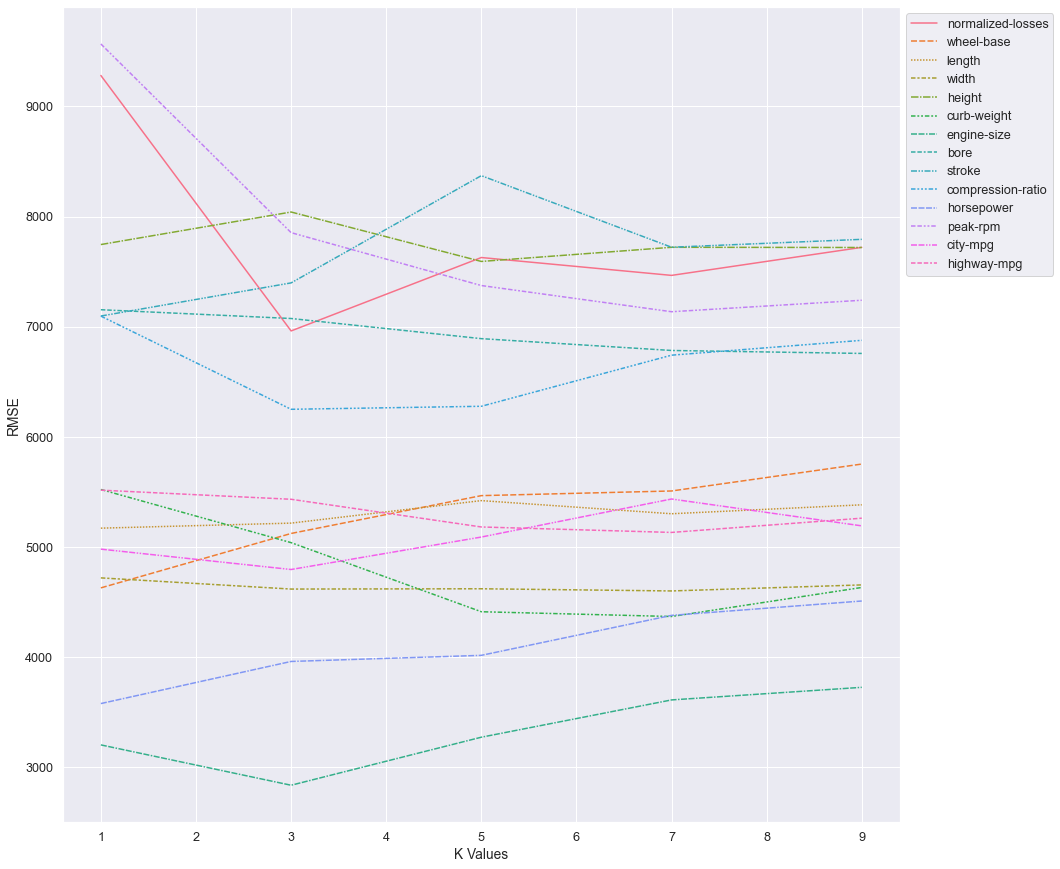

In [14]:
plt.figure('bestk', figsize=(15,15))
sns.set_theme(font_scale=1.15, style='darkgrid')
sns.lineplot(data=rmse_data)
plt.xlabel('K Values')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

# Multivariate

I can try to use the columns with the lowest errors as my features and experiment with some combinations to find a model with the lowest RMSE.

In [15]:
rmse_data_sorted = rmse_data.mean().sort_values(axis=0)
rmse_data_sorted

engine-size          3328.324887
horsepower           4087.353360
width                4641.671669
curb-weight          4793.725423
city-mpg             5097.581440
wheel-base           5294.808334
length               5297.569528
highway-mpg          5303.818305
compression-ratio    6647.668952
bore                 6931.745402
stroke               7675.790929
height               7763.674309
normalized-losses    7811.063149
peak-rpm             7833.873154
dtype: float64

In [16]:
multi = {}
top_features = range(2, 7)
for each in top_features:
#     print(rmse_data_sorted.index[:each])
    multi[each] = knn_train_test(rmse_data_sorted.index[:each], target, normal_working_set, 5)
    
multi

{2: 2955.187607386625,
 3: 3567.456573132758,
 4: 3487.563298747749,
 5: 3360.832156381264,
 6: 3667.4622629683636}

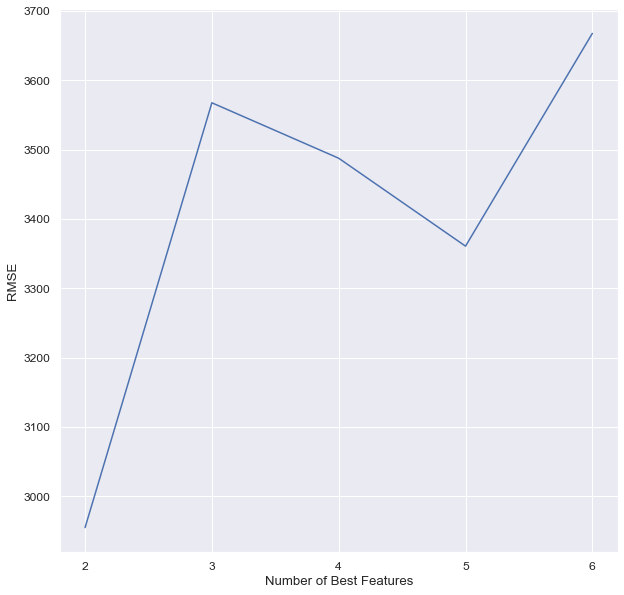

In [17]:
sns.set_theme(font_scale=1.1, style='darkgrid')
plt.figure('multivariate', figsize=(10,10))
plt.plot(multi.keys(), multi.values())
plt.xlabel('Number of Best Features')
plt.ylabel('RMSE')
plt.xticks(top_features)
plt.show()

It seems including the lowest 3rd feature, `width`, increasd our error because adding the next lowest feature decreases the error. I will show what the error looks like without `width`.

In [18]:
def plot_feature_combination(feature_list, drop_list=[]):
    multi = {}
    top_features = range(2, 8)
    features = feature_list.index.drop(drop_list)
    for each in top_features:
    #     print(rmse_data_sorted.index[:each])
        multi[each] = knn_train_test(features[:each], target, normal_working_set, 5)

    print(multi)
    sns.set_theme(font_scale=1.1, style='darkgrid')
    plt.figure('multivariate', figsize=(10,10))
    plt.plot(multi.keys(), multi.values())
    plt.xlabel('Number of Best Features')
    plt.ylabel('RMSE')
    plt.xticks(top_features)
    plt.show()

{2: 2955.187607386625, 3: 3424.9595705353922, 4: 3176.688063295663, 5: 3350.483315452968, 6: 3365.7533266479268, 7: 3339.777455560964}


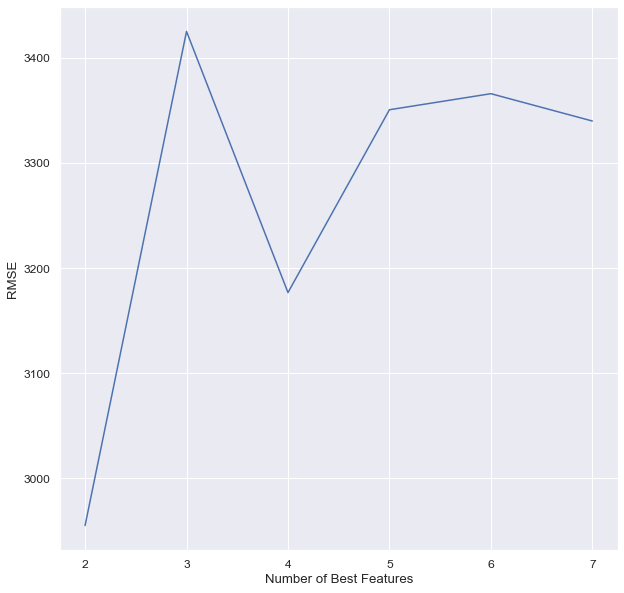

{2: 2955.187607386625, 3: 2961.711827592781, 4: 3259.842040150515, 5: 3496.4392340247705, 6: 3363.754047824755, 7: 3441.5918943890997}


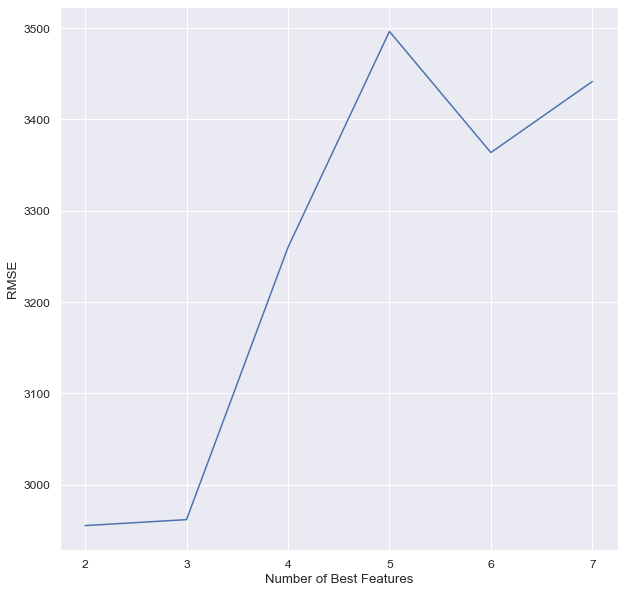

In [19]:
plot_feature_combination(rmse_data_sorted, ['width'])
plot_feature_combination(rmse_data_sorted, ['width','curb-weight'])

Without `width` the error generally lowers but now with `curb-weight` there is a spike in error.

Taking out `curb-weight` lowers the error of a 3 feature model consisting of `engine-size`, `horsepower`, and `city-mpg`. However, there is spike when adding `length` as a feature.

{2: 2955.187607386625, 3: 2961.711827592781, 4: 3226.1236903972813, 5: 3162.50319822951, 6: 3191.6642369748356, 7: 3023.665487417876}


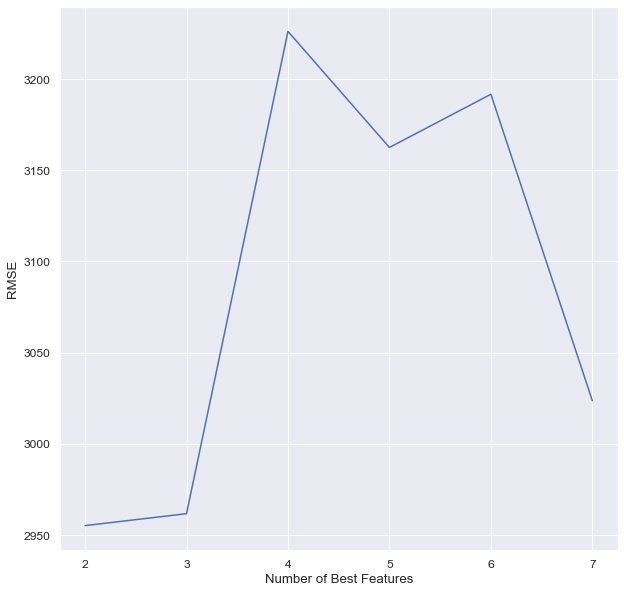

In [20]:
plot_feature_combination(rmse_data_sorted, drop_list=['width','curb-weight','wheel-base'])

{2: 2955.187607386625, 3: 2961.711827592781, 4: 2849.3177111389145, 5: 2733.616943404348, 6: 3651.70602473544, 7: 3809.536958531291}


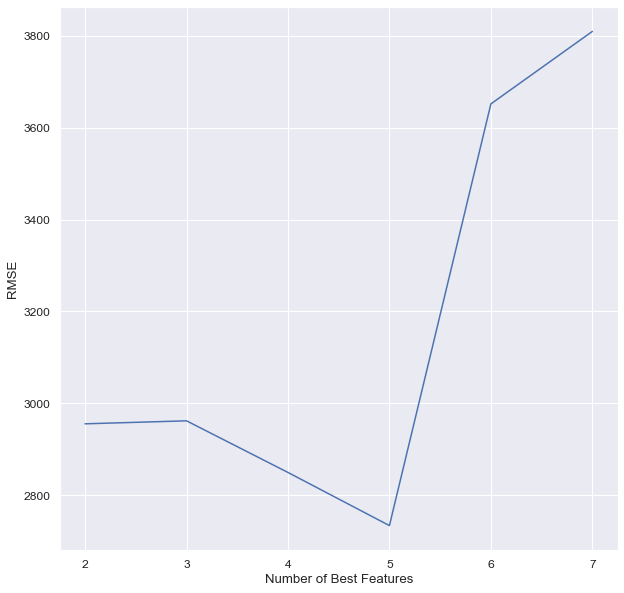

In [21]:
plot_feature_combination(rmse_data_sorted, ['width','curb-weight','wheel-base','length','highway-mpg'])

It seems that using certain columns as features will produc the lowest errors. I will explore different combinations later in the project. However, I will try tuning a model with `engine-size`, `horsepower`, `city-mpg`, `compression-ratio`, `bore`.

In [22]:
top_features = ['engine-size', 'horsepower', 'city-mpg', 'compression-ratio', 'bore']

## Hyperparameter Tuning

In [23]:
hyprprmtr = {}
for i in range(1,16):
    hyprprmtr[i] = knn_train_test(top_features, target, normal_working_set, i)

hyprprmtr = pd.Series(hyprprmtr)

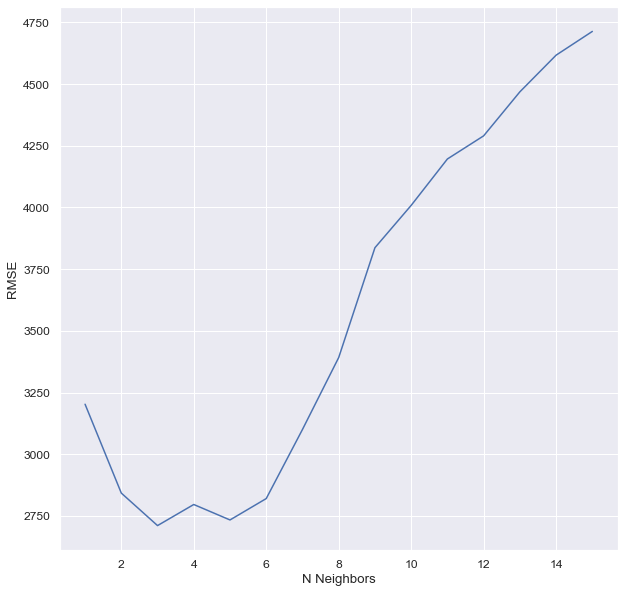

In [24]:
sns.set_theme(font_scale=1.1, style='darkgrid')
plt.figure('multivariate', figsize=(10,10))
sns.lineplot(data=hyprprmtr)
plt.xlabel('N Neighbors')
plt.ylabel('RMSE')
# plt.xticks((2,3,4,5))
plt.show()

In [25]:
hyprprmtr

1     3202.547778
2     2842.505658
3     2710.760814
4     2796.216614
5     2733.616943
6     2820.254764
7     3100.236260
8     3391.742210
9     3836.733755
10    4008.250044
11    4196.280138
12    4290.039908
13    4468.357086
14    4616.968334
15    4713.215638
dtype: float64

At 3 neighbors the error was 2710 and at 5 neighbors it was 2733. I can try these hyperparameters along with the list of 5 features in KFold Validation algorithm.

# K-Fold Validation

In [53]:
def k_fold_validation(df, train_cols, target_col, k=[5], f=[10]):
#     k = list(k)
#     f = list(f)
    train_cols = list(train_cols)
    grid_mean = {key:[] for key in f}
    grid_std = {key:[] for key in f}
    #     grid = {}
    knn = KNeighborsRegressor()
    for folds in f:
        kf = KFold(folds, shuffle=True, random_state=1)
        for neighbors in k:
            knn.set_params(n_neighbors=neighbors)
            cross_vals = np.abs(cross_val_score(knn,
                                                df[train_cols], df[target_col], 
                                                scoring='neg_root_mean_squared_error',
                                                cv=kf
                                               )
                               )
#             display(folds, neighbors)
            grid_mean[folds].append(np.mean(cross_vals))
            grid_std[folds].append(np.std(cross_vals))

#     display(grid_mean)        
#     grid = pd.DataFrame(grid)
#     return grid, grid.mean(), grid.std()
    return pd.DataFrame(grid_mean, index=k), pd.DataFrame(grid_std, index=k) 

# Univariate KFolds

Starting from a univariate model will help me develop a multivariate model.

In [54]:
search_fold_k = k_fold_validation(normal_working_set, ['engine-size'], 'price', k=range(2,8), f=range(2,11))
search_mean = pd.DataFrame(search_fold_k[0])
search_std = pd.DataFrame(search_fold_k[1])
search_mean

,2,3,4,5,6,7,8,9,10
2,3382.874124,3126.229644,3316.273173,3593.937721,3137.961571,3378.412972,3338.271858,3267.102877,3424.007865
3,3258.917559,3084.098637,3033.423336,3223.785426,2973.423987,3101.247111,3121.994340,3086.269275,3208.631991
4,3397.546133,3123.661797,3075.291273,3089.935762,3065.380597,3116.075104,3033.969163,3034.497549,3086.188756
5,3454.664479,3209.030444,3215.895907,3108.245840,3098.859776,3115.919109,3041.478052,3099.786187,3078.127185
6,3489.588988,3375.059009,3360.371657,3268.032798,3214.405428,3180.461381,3189.097004,3250.427690,3181.058489
7,3701.382467,3437.068390,3448.646410,3401.602104,3324.518055,3296.800440,3319.489142,3353.354468,3303.321089


In [35]:
def subplot_layout(data, font_scale, figsize, title, ylabel, xlabel, figname=None):
    l = len(data)
    rows = int(np.ceil(l/2))
    fig = plt.figure(figname, figsize=figsize)
    ax = fig.subplots(rows, 2, sharex=False, sharey=True).flat
    sns.set_theme(font_scale=font_scale,style='darkgrid')
    
    for i in range(l):
        sns.lineplot(data=data.iloc[i], label=data.index[i], ax=ax[i])

    fig.subplots_adjust(top=0.85, bottom=.1, left=.1, right=.9)
    fig.suptitle(title, x=.5, y=.9)
    fig.supylabel(ylabel, y=.5)
    fig.supxlabel(xlabel, x=.5, y=.01)
    plt.show()

###
#  l = len(search_mean)
# fig = plt.figure('search_mean', figsize=(30,20))
# sns.set_theme(font_scale=1.5,style='darkgrid')
# for i in range(l):
#     plt.subplot(np.ceil(l//2),2,i+1)
#     sns.lineplot(data=search_mean.iloc[i,:], label=search_mean.index[i])
# 
# fig.suptitle('Folds vs K Neighbors', x=.5, y=.9)
# fig.supylabel('N Neighbors', x=.06, y=.5)
# fig.supxlabel('Folds', x=.5, y=.09)
# plt.show()

<AxesSubplot:>

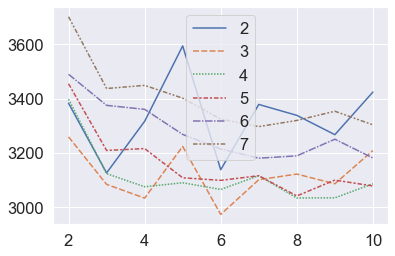

In [57]:
fig = plt.figure(figsize=(20,20))
# ax = fig.subplots(rows, 2, sharex=False, sharey=True).flat
sns.set_theme(font_scale=font_scale,style='darkgrid')
sns.lineplot(data=search_mean.T)
fig.subplots_adjust(top=0.85, bottom=.1, left=.1, right=.9)
fig.suptitle(title, x=.5, y=.9)
fig.supylabel(ylabel, y=.5)
fig.supxlabel(xlabel, x=.5, y=.01)
plt.show()

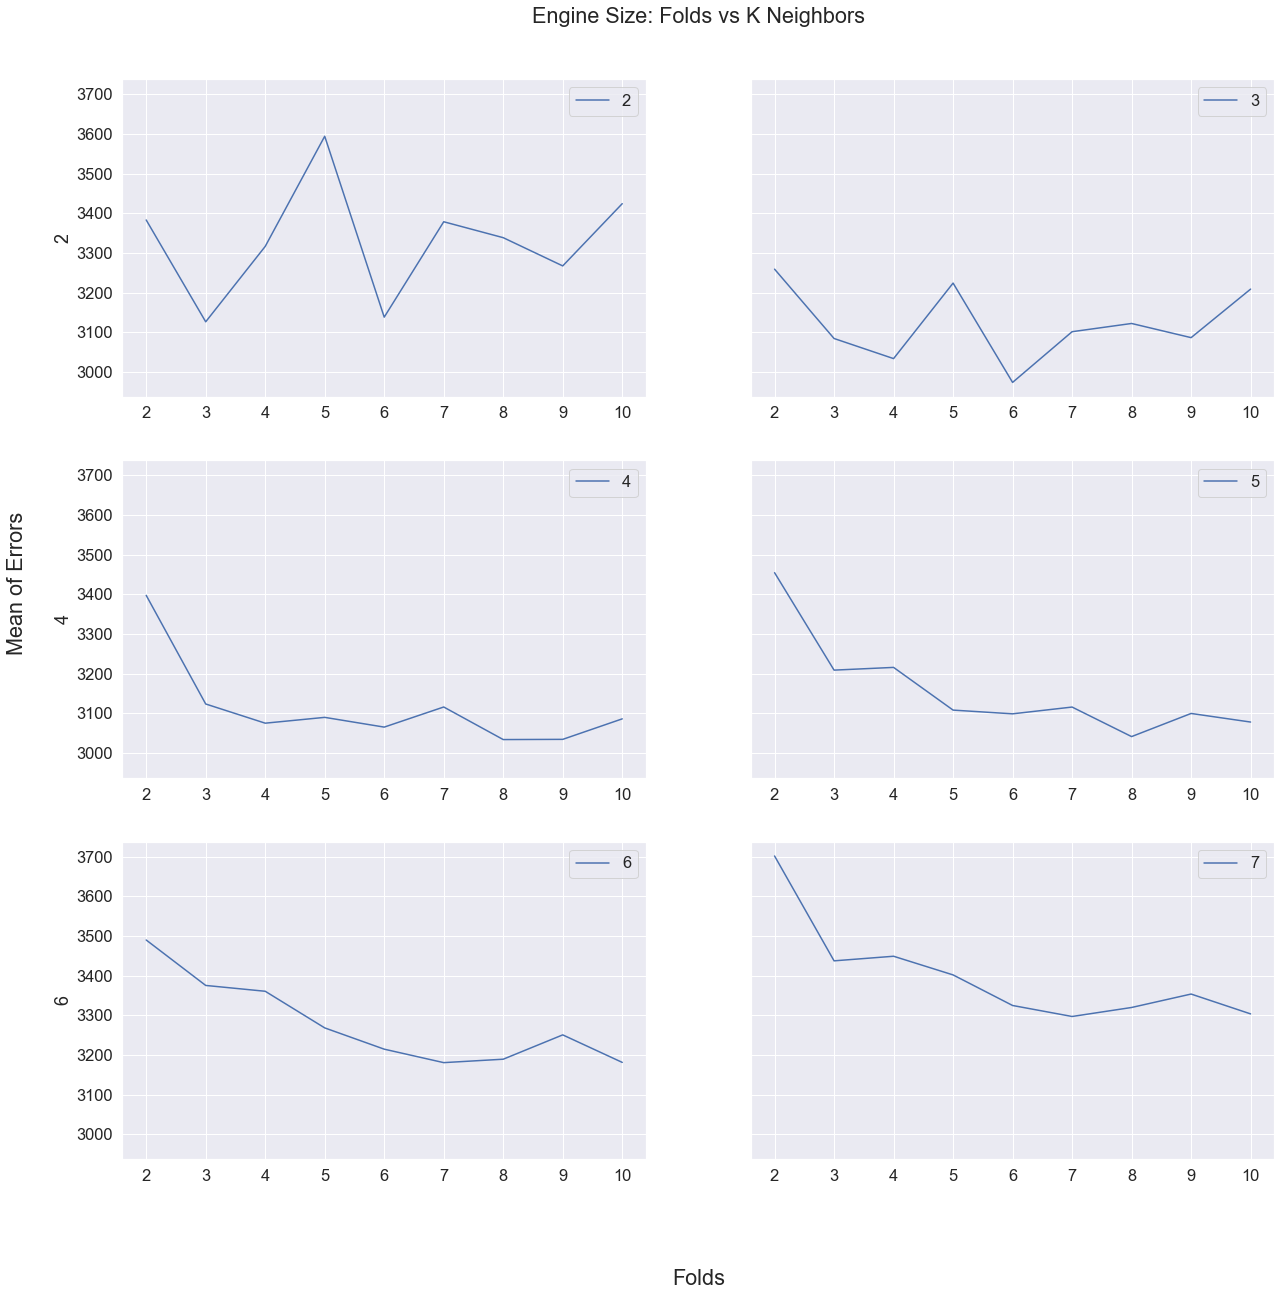

In [56]:
subplot_layout(search_mean, 1.5, (20,20), 'Engine Size: Folds vs K Neighbors', 'Mean of Errors', 'Folds', 'search_mean')    

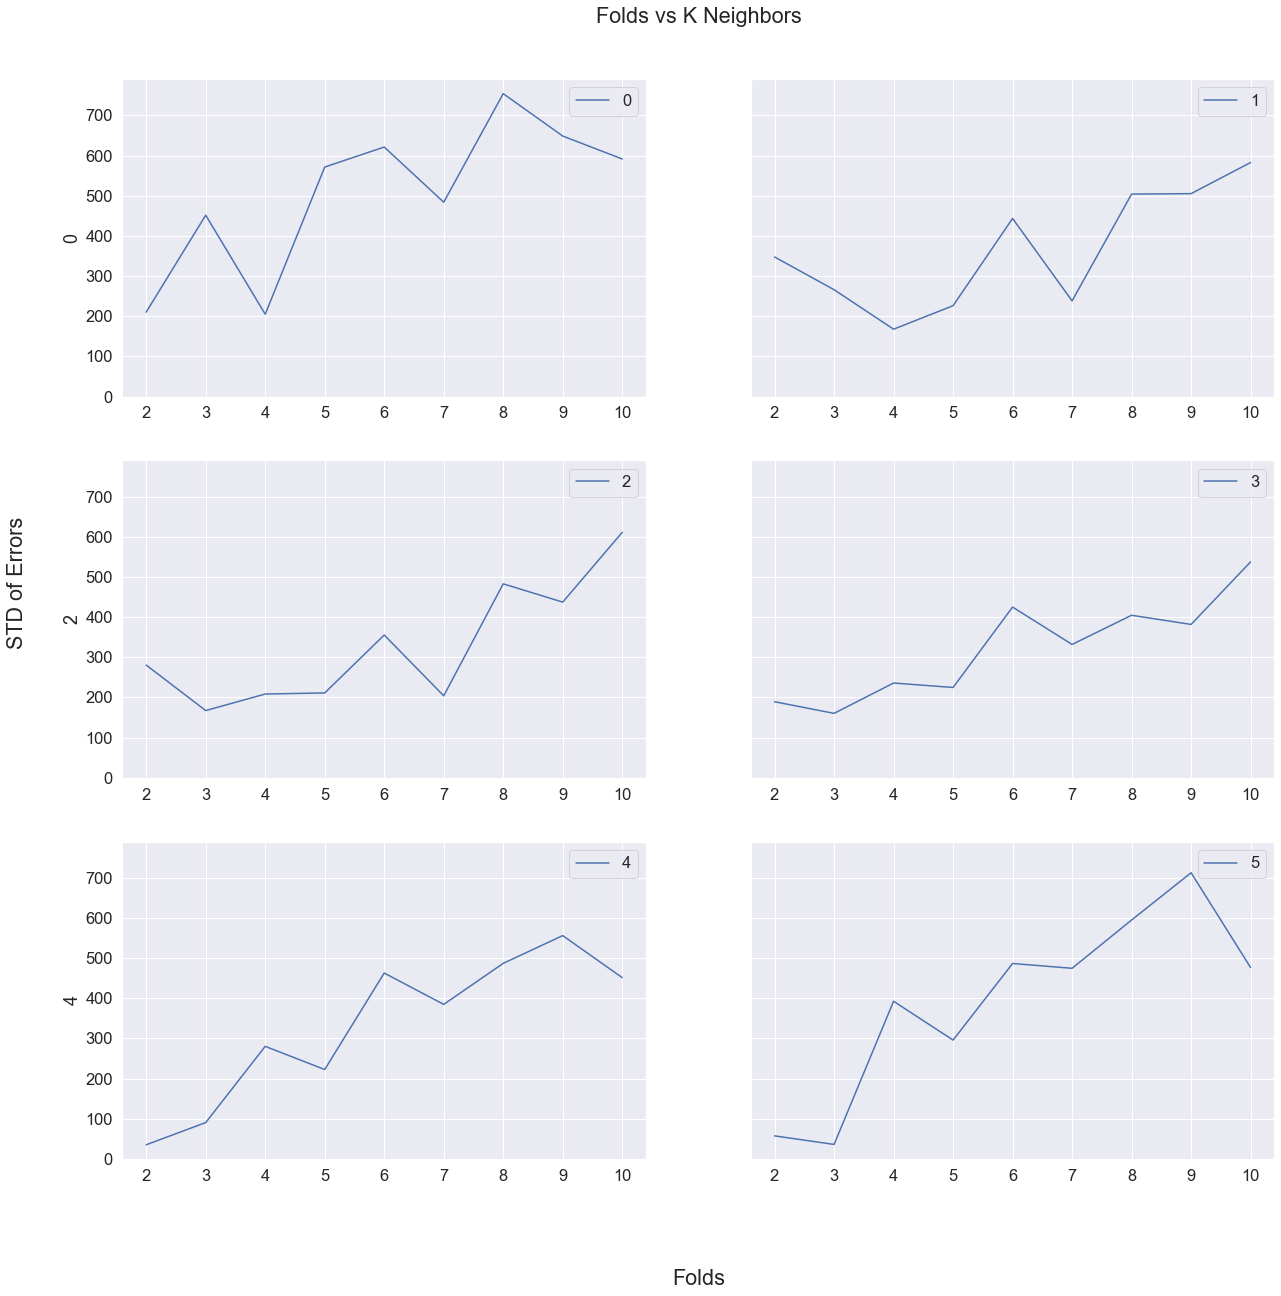

In [37]:
subplot_layout(search_std, 1.5, (20,20), 'Folds vs K Neighbors', 'STD of Errors', 'Folds', 'search_std')   

# Multivariate KFolds

## Different Data Cleaning

Since `normalized-losses` had many missing values and did not particularly have a strong correlation with `price`, I think it will not be helpful for my model. I will also try to interpolate the missing `price` values to preserve the information of those rows.

In [38]:
interpol_set = cars[features + target].drop(['normalized-losses'],axis=1).astype('float')
interpol_normal = (interpol_set - interpol_set.mean()) / interpol_set.std()
interpol_normal['price'] = interpol_set['price']
interpol_normal_clean = interpol_normal.dropna(axis=0)
interpol_set.isna().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [39]:
interpol_corr = interpol_normal.corr()['price'].sort_values(ascending=False).drop('price', axis=0)
interpol_corr

engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543436
height               0.135486
stroke               0.082310
compression-ratio    0.071107
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [40]:
interpol_set[interpol_set['price'].isna()]

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,99.5,178.2,67.9,52.0,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
44,94.5,155.9,63.6,52.0,1874.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
45,94.5,155.9,63.6,52.0,1909.0,90.0,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
129,98.4,175.7,72.3,50.5,3366.0,203.0,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,NaN


In [41]:
top_corr = interpol_corr[interpol_corr > .7]
sns.set_theme(style='darkgrid', font_scale=1.2)
# for each in top_corr.index:
#     plt.figure(each, figsize=(10,10))
#     sns.scatterplot(x=each, y='price', data=interpol_normal)

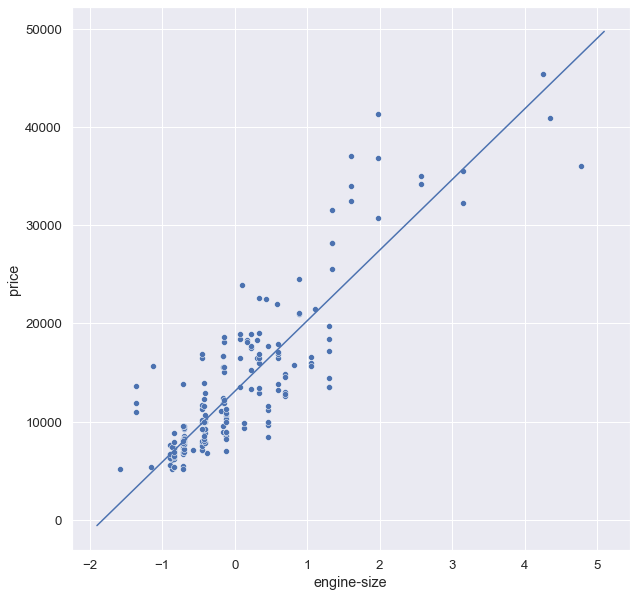

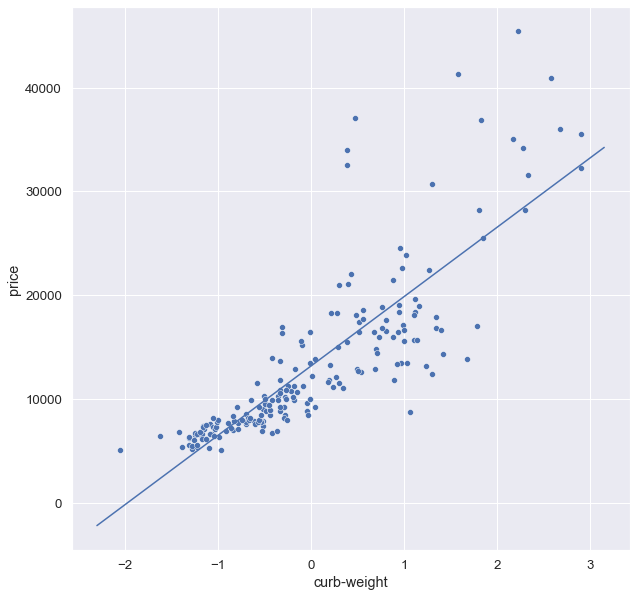

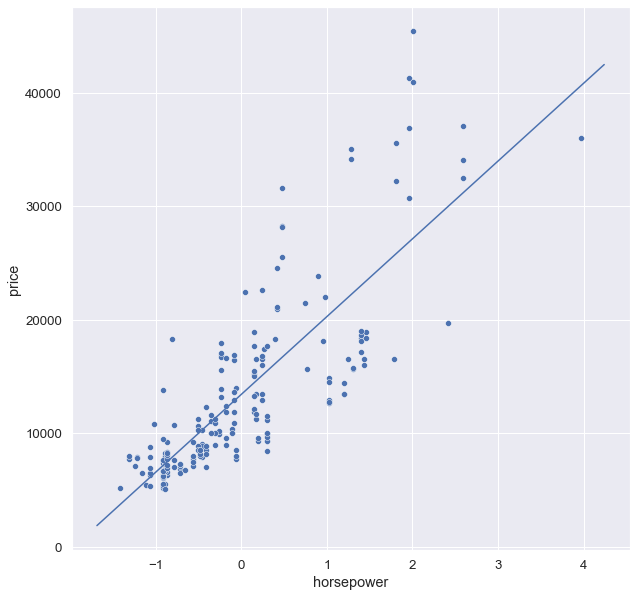

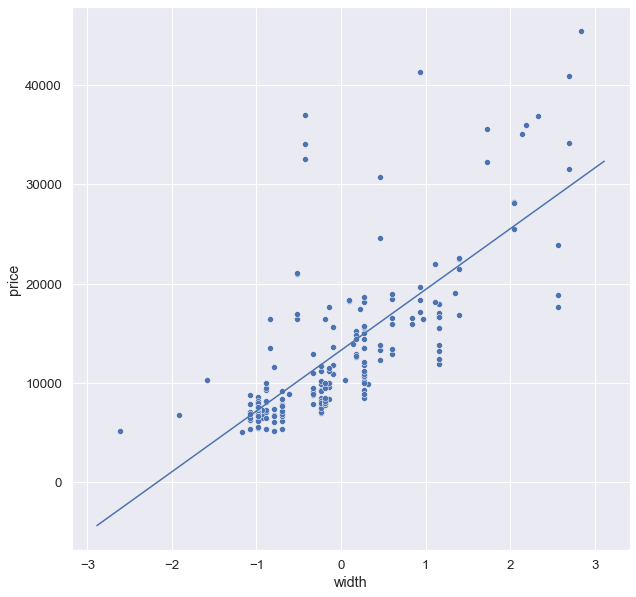

In [42]:
# lr = LinearRegression()
linreg = {}
for each in top_corr.index:
    lr = LinearRegression()
    linreg[each] = lr.fit(interpol_normal_clean[[each]], interpol_normal_clean['price'])

    
for each in top_corr.index:
    plt.figure(each, figsize=(10,10))
    sns.scatterplot(x=each, y='price', data=interpol_normal)
    x = np.linspace(plt.xlim()[0], plt.xlim()[1])
    sns.lineplot(x=x, y=linreg[each].coef_*x + linreg[each].intercept_)

In [43]:
def meanofinterpol(x):
    interpols = []
    for each in top_corr.index:
#         display(x)
        val = x[each]
        interpols.append(linreg[each].coef_*val + linreg[each].intercept_)
    return np.mean(interpols)

new_price = interpol_normal[interpol_normal['price'].isna()].apply(meanofinterpol, axis=1)

In [44]:
interpol_normal['price'].iloc[new_price.index] = new_price.values
display(interpol_normal.iloc[new_price.index])

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0.123454,0.336438,0.928674,-0.705898,0.955354,0.098281,-0.730248,0.456486,-0.791164,1.403619,0.781564,-1.409250,-1.270789,18846.572237
44,-0.706865,-1.471091,-1.075797,-0.705898,-1.308991,-0.886286,-1.095827,-0.459157,-0.136589,-0.862563,0.572941,1.953563,1.778680,6347.463698
45,-0.706865,-1.471091,-1.075797,-0.705898,-1.241772,-0.886286,-1.095827,-0.459157,-0.136589,-0.862563,0.572941,1.953563,1.778680,6459.739668
129,-0.059216,0.133800,2.979761,-1.319766,1.556491,1.827276,2.230941,-0.459157,-0.035885,4.626634,1.303120,-1.256395,-0.399512,31617.528530
9,0.123454,0.336438,0.928674,-0.705898,0.955354,0.098281,-0.730248,0.456486,-0.791164,1.403619,0.781564,-1.409250,-1.270789,18846.572237
44,-0.706865,-1.471091,-1.075797,-0.705898,-1.308991,-0.886286,-1.095827,-0.459157,-0.136589,-0.862563,0.572941,1.953563,1.778680,6347.463698
45,-0.706865,-1.471091,-1.075797,-0.705898,-1.241772,-0.886286,-1.095827,-0.459157,-0.136589,-0.862563,0.572941,1.953563,1.778680,6459.739668
129,-0.059216,0.133800,2.979761,-1.319766,1.556491,1.827276,2.230941,-0.459157,-0.035885,4.626634,1.303120,-1.256395,-0.399512,31617.528530


In [45]:
missing = interpol_normal[interpol_normal[top_corr.index].isna().any(axis=1)]
display(missing)
fill = 'horsepower'

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,-0.441163,0.603920,0.276055,0.603687,0.045007,0.122295,0.476162,2.03518,-0.363173,NaN,NaN,-0.339264,0.036126,9295.0
131,-0.441163,0.222961,0.322671,-1.319766,-0.183540,0.122295,0.476162,2.03518,-0.363173,NaN,NaN,-0.339264,0.036126,9895.0
130,-0.441163,0.603920,0.276055,0.603687,0.045007,0.122295,0.476162,2.03518,-0.363173,NaN,NaN,-0.339264,0.036126,9295.0
131,-0.441163,0.222961,0.322671,-1.319766,-0.183540,0.122295,0.476162,2.03518,-0.363173,NaN,NaN,-0.339264,0.036126,9895.0


In [46]:
for each in missing.index:
    x = (interpol_normal.iloc[each].loc['price'] - linreg[fill].intercept_) / linreg[fill].coef_
    interpol_normal.iloc[each].loc[fill] = x
    
interpol_normal.iloc[missing.index]

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,-0.441163,0.603920,0.276055,0.603687,0.045007,0.122295,0.476162,2.03518,-0.363173,-0.601686,NaN,-0.339264,0.036126,9295.0
131,-0.441163,0.222961,0.322671,-1.319766,-0.183540,0.122295,0.476162,2.03518,-0.363173,-0.514123,NaN,-0.339264,0.036126,9895.0
130,-0.441163,0.603920,0.276055,0.603687,0.045007,0.122295,0.476162,2.03518,-0.363173,-0.601686,NaN,-0.339264,0.036126,9295.0
131,-0.441163,0.222961,0.322671,-1.319766,-0.183540,0.122295,0.476162,2.03518,-0.363173,-0.514123,NaN,-0.339264,0.036126,9895.0


## Correlation for Feature Fitting

In [47]:
top_corr

engine-size    0.872335
curb-weight    0.834415
horsepower     0.810533
width          0.751265
Name: price, dtype: float64

In [48]:
def singleplot_layout(data, font_scale, figsize, title, ylabel, xlabel, figname=None):
    l = len(data)
    fig = plt.figure(figname, figsize=figsize)
    sns.set_theme(font_scale=font_scale,style='darkgrid')
#     rows = int(np.ceil(l/2))
    for i in range(l):
#         plt.subplot(rows,2,i+1)
        sns.lineplot(data=data.iloc[i,:], label=data.index[i])

#     fig.subplots_adjust(top=0.85, bottom=.1, left=.1, right=.9)
    fig.suptitle(title, x=.5, y=.9)
#     fig.supylabel(ylabel, x=.05, y=.5)
#     fig.supxlabel(xlabel, x=.5, y=.09)
    
#     fig.supylabel(ylabel, y=.5)
    plt.legend(title=ylabel)
    fig.supxlabel(xlabel, x=.5, y=.01)
    plt.show()

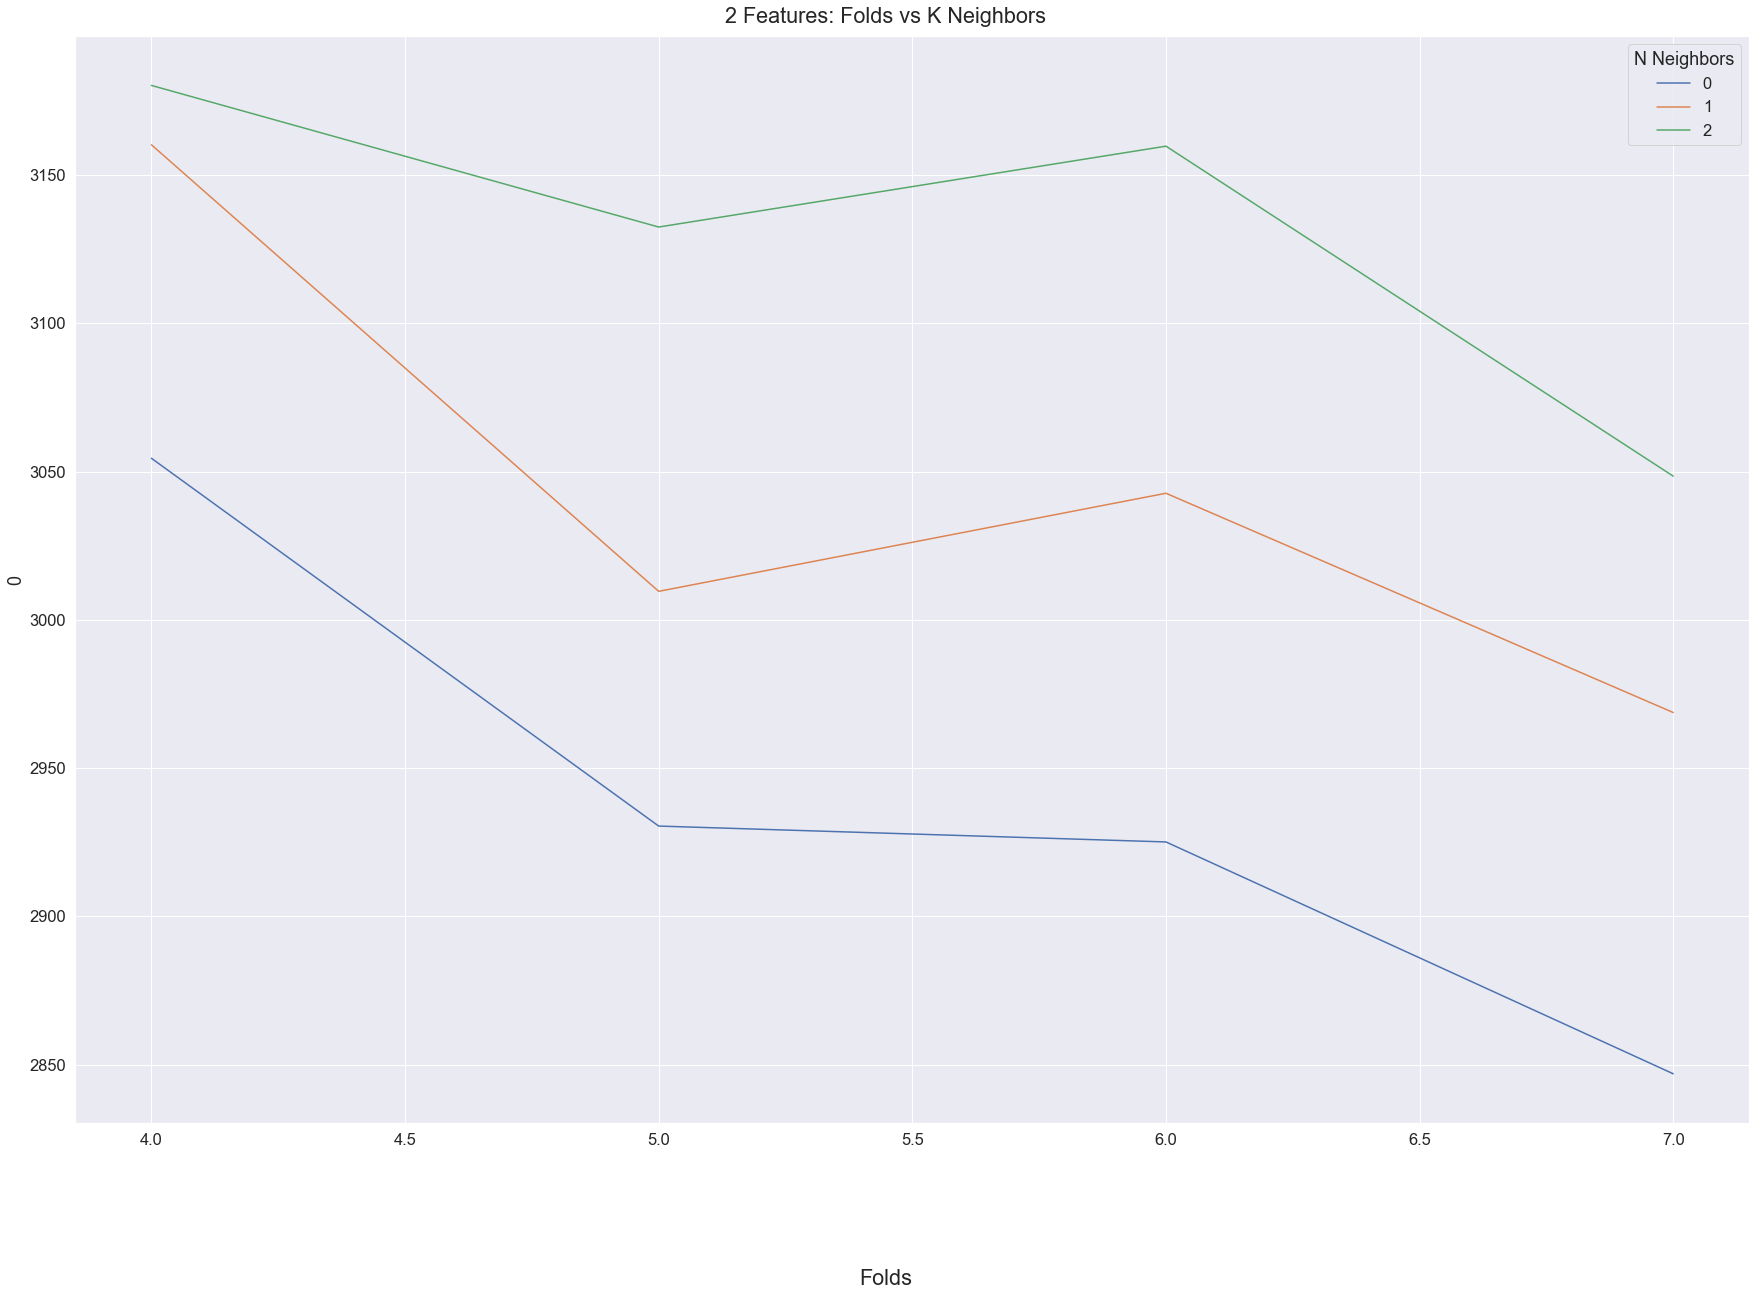

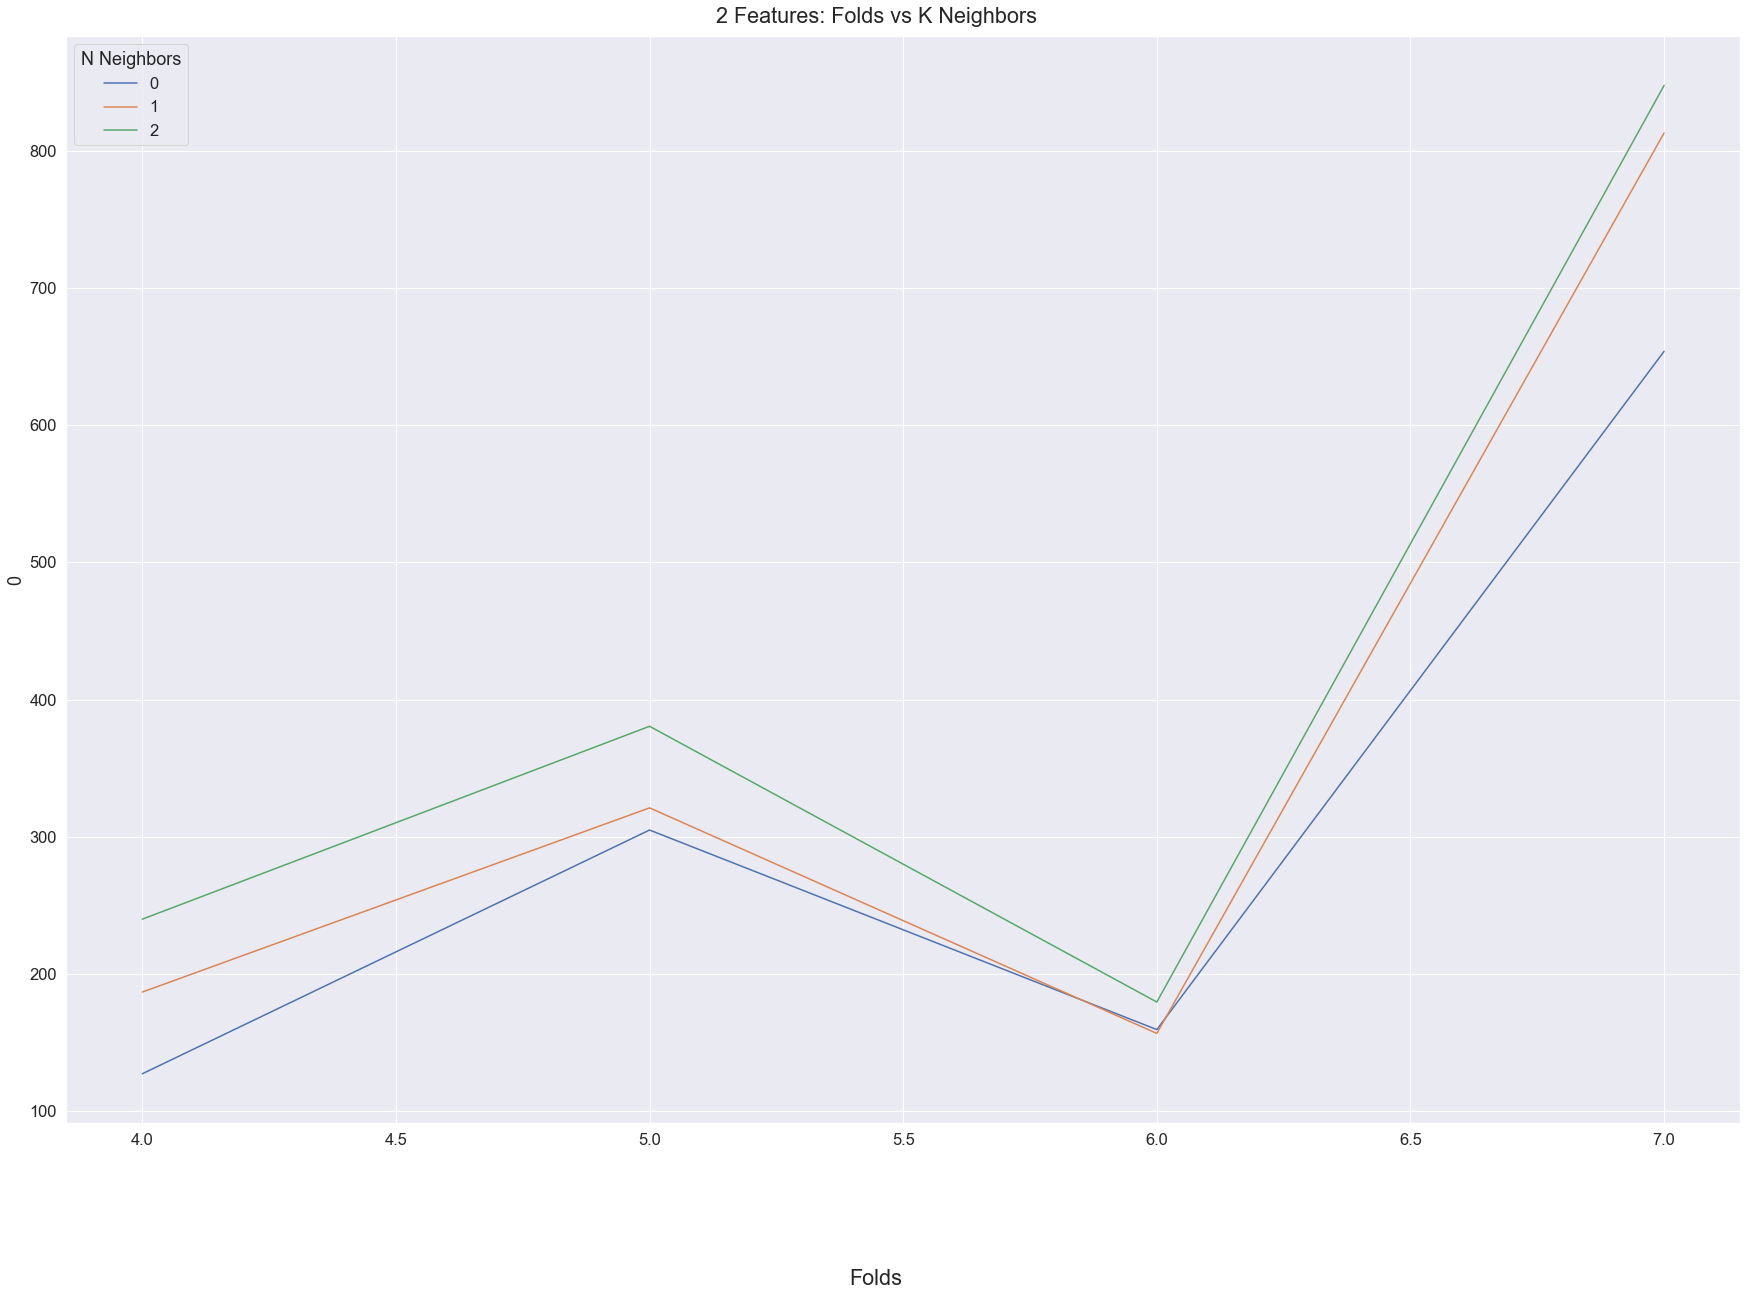

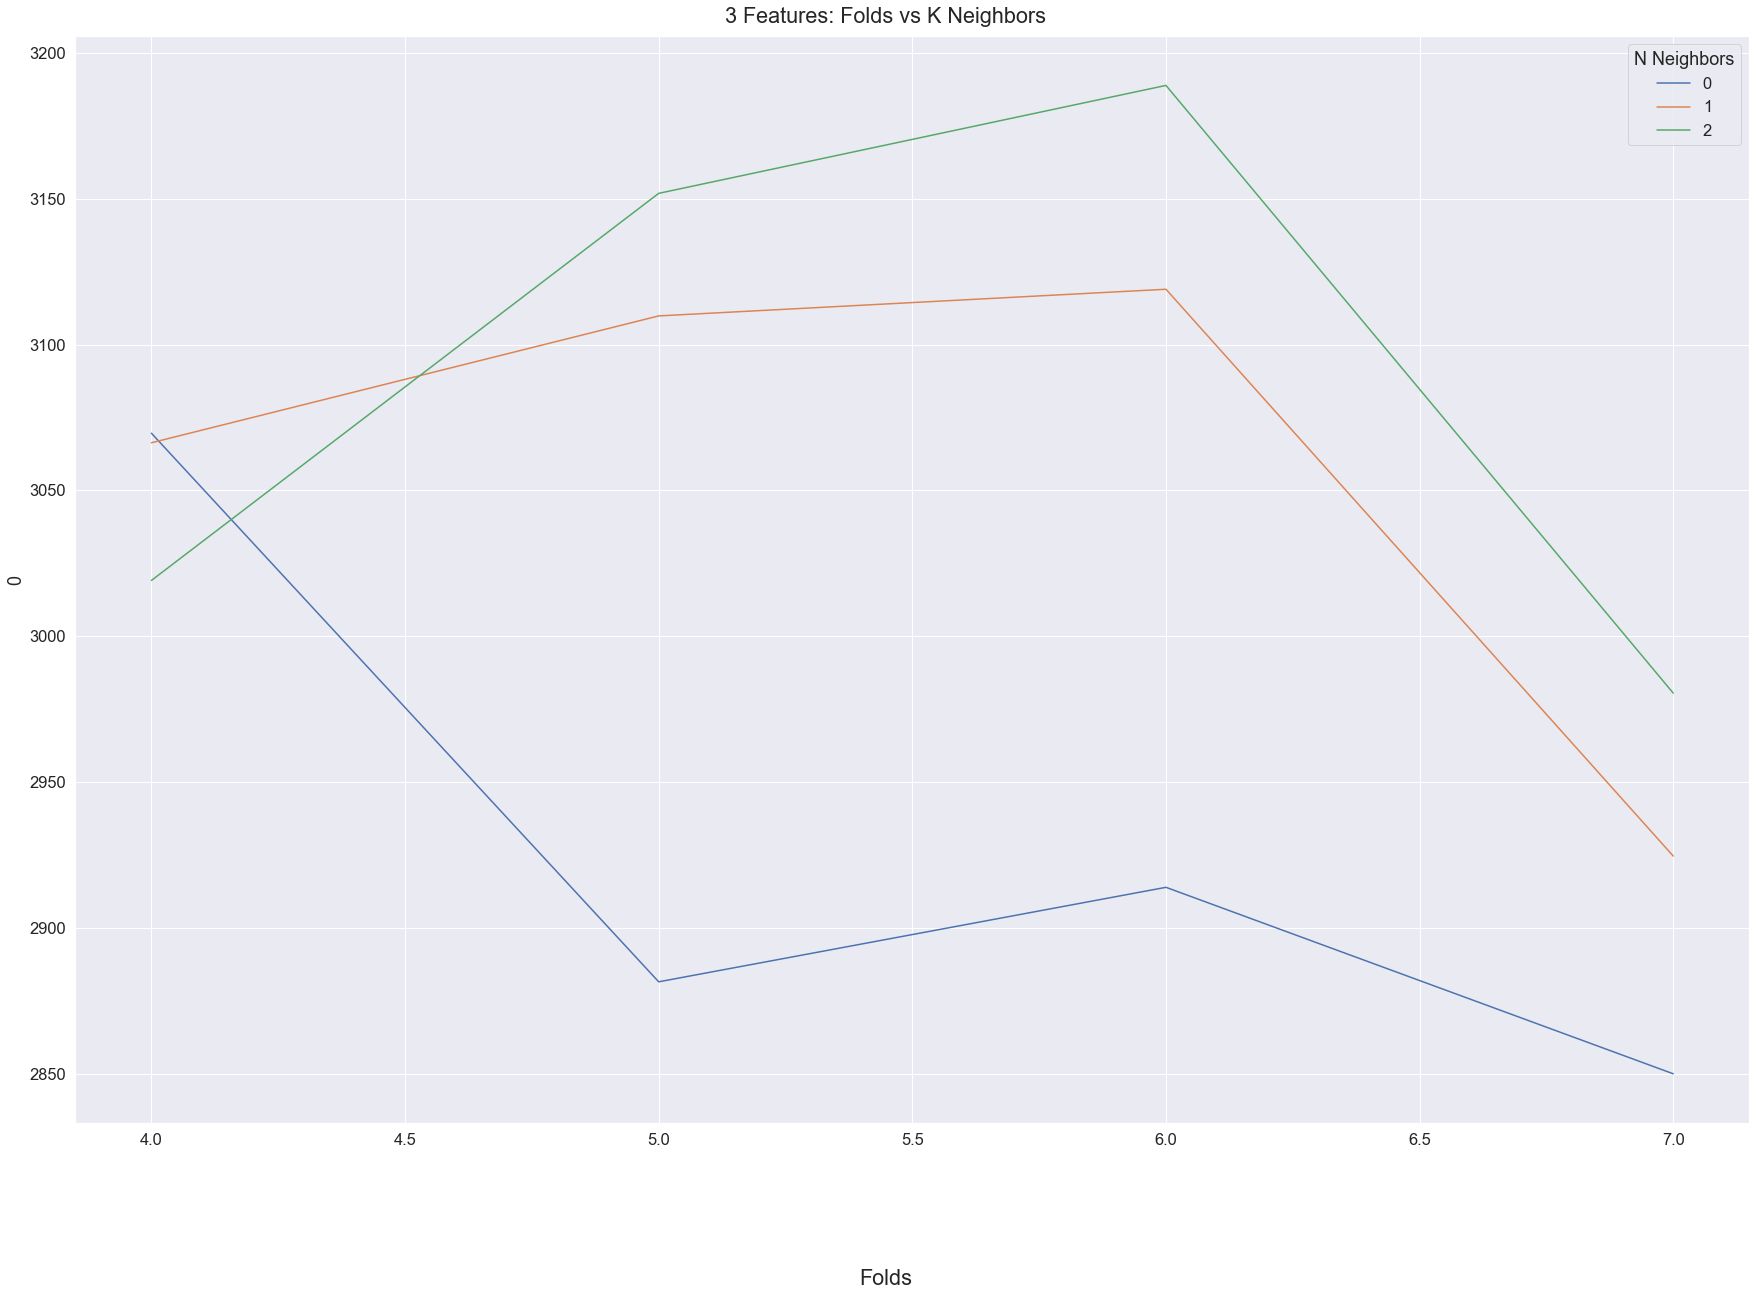

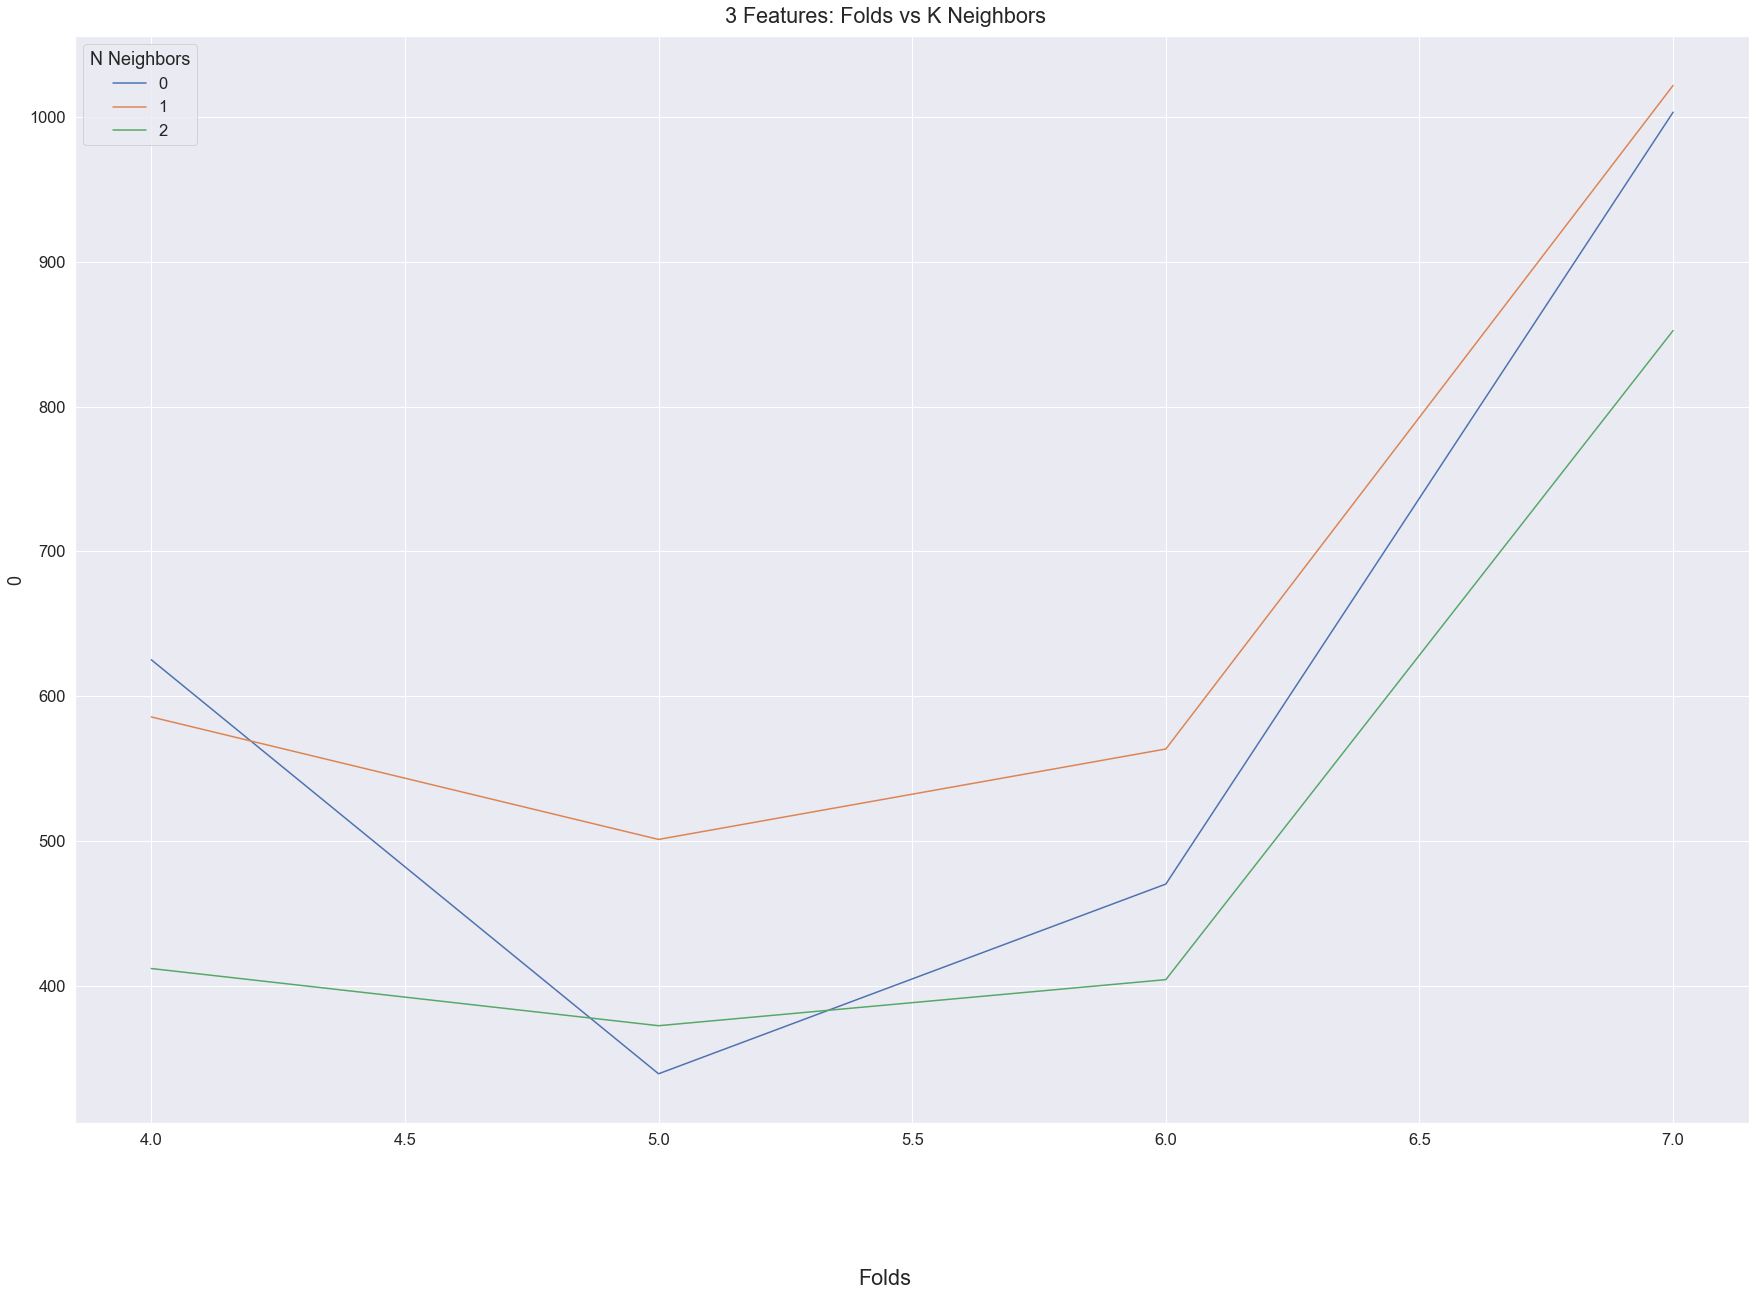

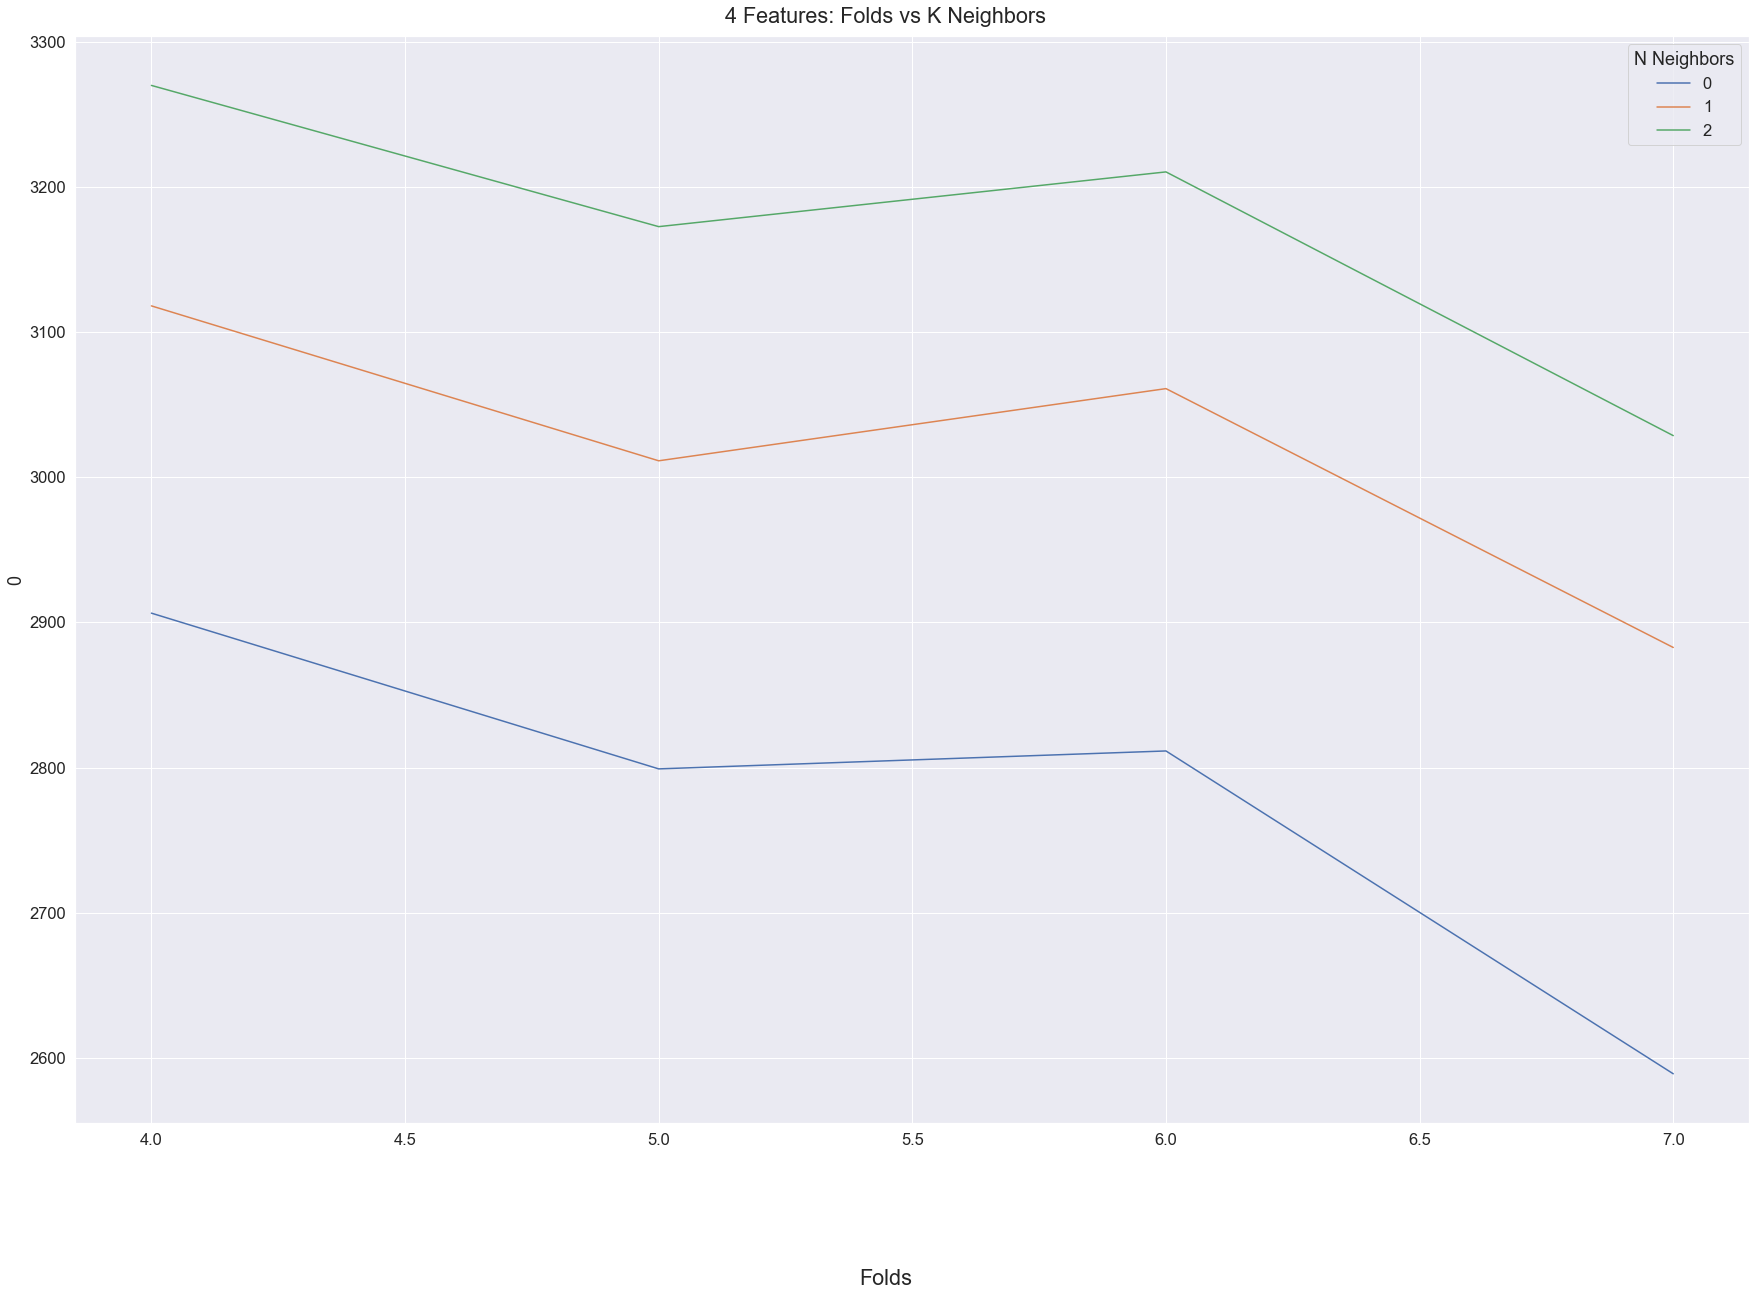

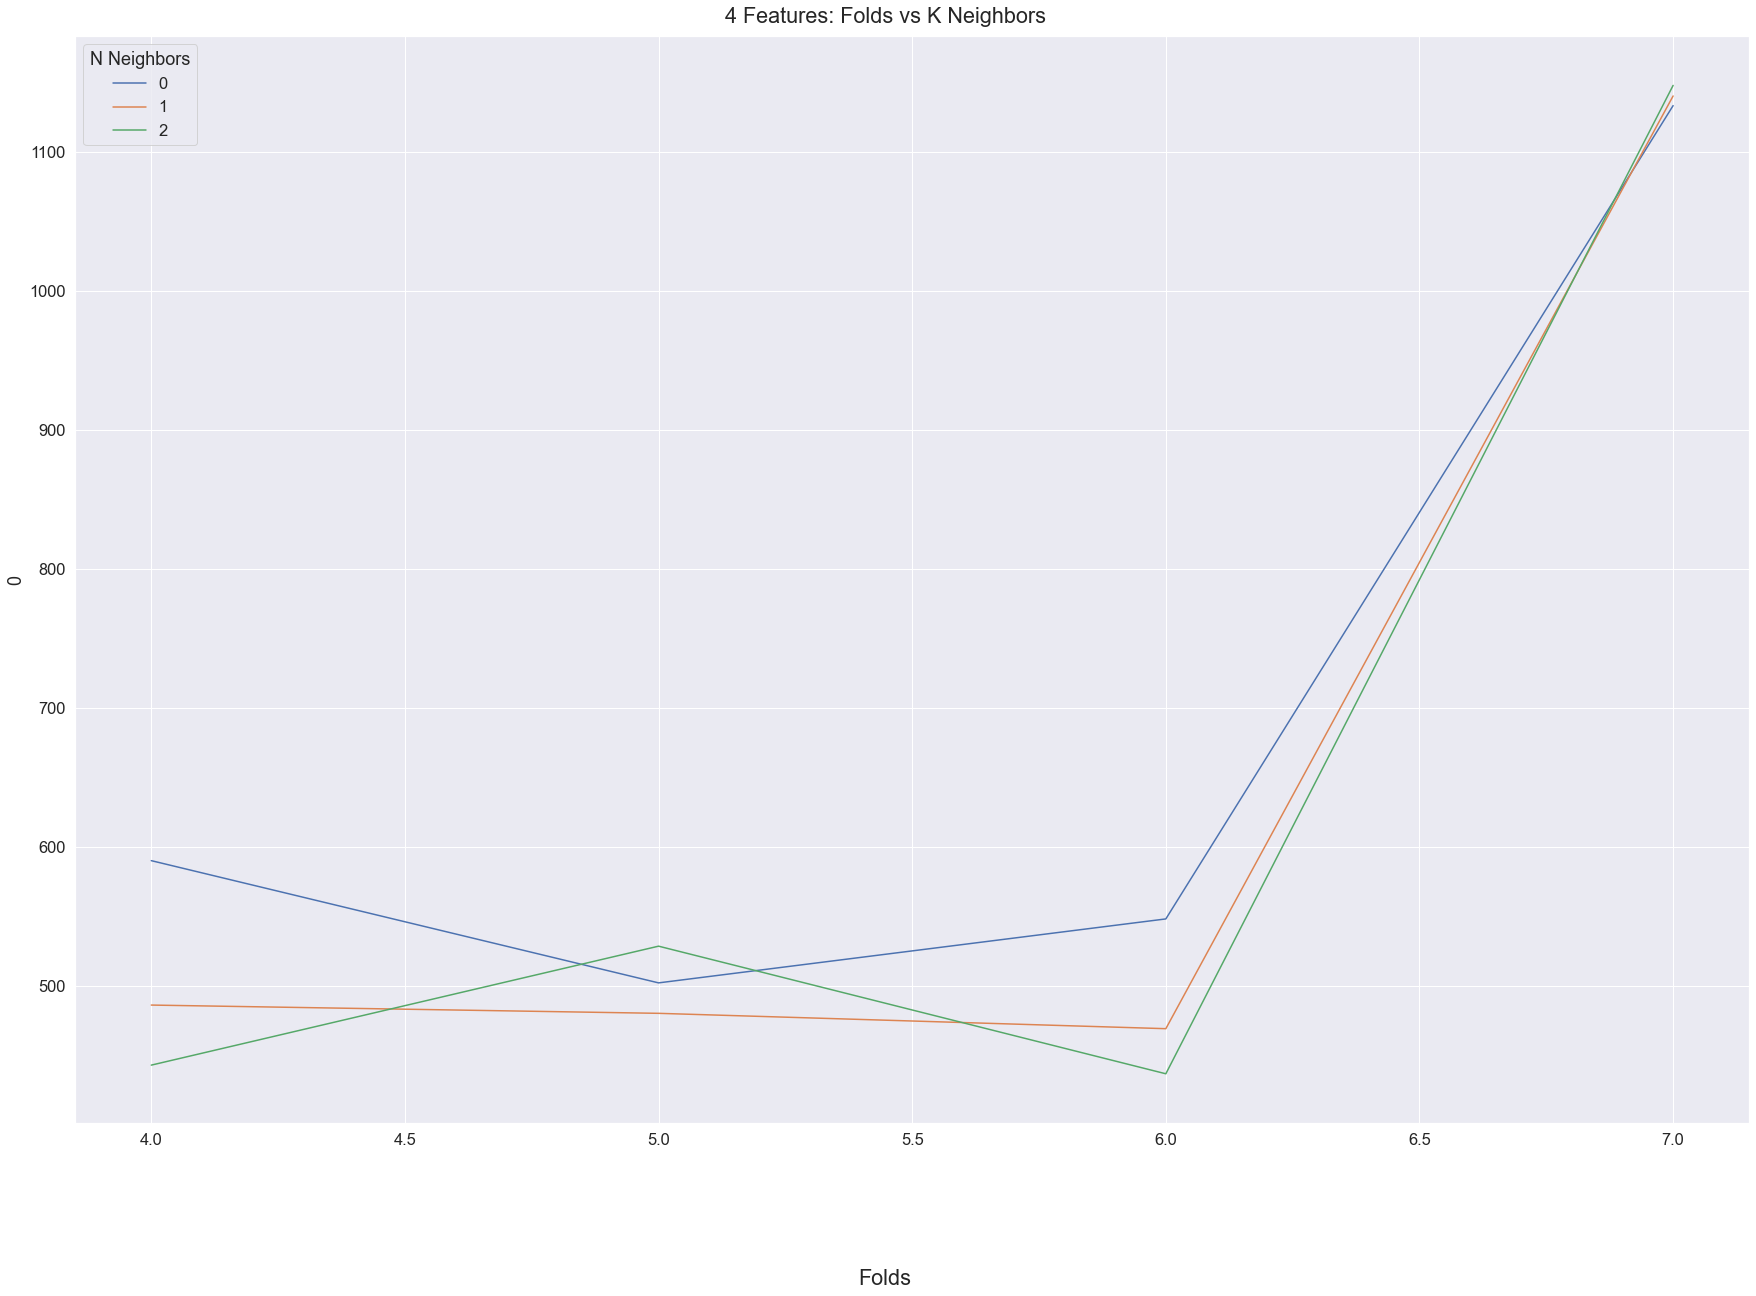

In [49]:
feat_err = []
for i in range(2, len(top_corr)+1, 1):
    search_fold_k = k_fold_validation(interpol_normal, top_corr.index[:i], 'price', k=[4,5,6], f=[4,5,6,7])
    search_mean = search_fold_k[0]
    search_std = search_fold_k[1]
    singleplot_layout(search_mean, 1.5, (10,10), f'{i} Features: Folds vs K Neighbors', 'N Neighbors', 'Folds')
    singleplot_layout(search_std, 1.5, (10,10), f'{i} Features: Folds vs K Neighbors', 'N Neighbors', 'Folds')
    feat_err.append(pd.DataFrame(search_mean.min(axis=0)))

feat_err = pd.concat(feat_err, axis=1)

In [50]:
feat_err.columns = [2,3,4]
display(feat_err.idxmin(axis=0).value_counts().sort_values())
display(feat_err.idxmin(axis=1).value_counts().sort_values())

7    3
dtype: int64

4    4
dtype: int64

In [51]:
feat_err
# subplot_layout(search_mean.T, 1.5, (30,20), f'{i} Features: Folds vs K Neighbors', 'Folds', 'N Neighbors')

,2,3,4
4,3054.519302,3019.127181,2906.333603
5,2930.477876,2881.469620,2799.050481
6,2925.121940,2913.876960,2811.397844
7,2846.933431,2849.922893,2589.013261


In [52]:
It seems that 7 folds provide the lowest error. However, it does not provide the lowest variance. A good balance of error and variance is at the second lowest error, 6 folds. Convincingly, 4 neighbors consistently produces the lowest error and relatively low variance. Cutting off at 0.75 correlation gave us only 4 features. For those 4 features using all of them produced the lowest error but not the lowest variance. However, I think the variance is low enough and less features would increase bias while providing sub-optimal error and variance. 

,4,5,6,7
0,2906.333603,2799.050481,2811.397844,2589.013261
1,3117.996397,3011.283429,3061.005977,2882.684954
2,3269.869922,3172.588792,3210.294072,3028.627468
